import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [7]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/54

make measure image

In [8]:
def_img = io.imread("image\\11.11.2020 Heptane-0.002mM Triton x-100\\frame 1\\8-40-44 PM\\11.11.2020 (1) 1777.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

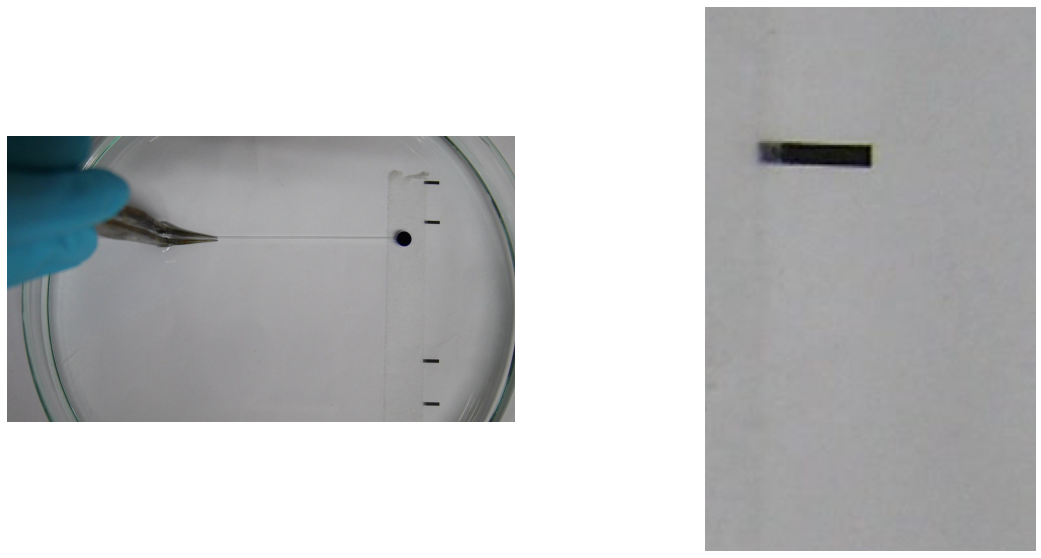

In [9]:
measure_im = crop(def_img, ((250, 550), (1550, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

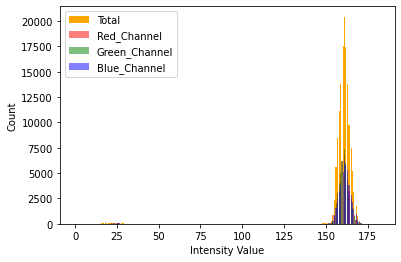

In [10]:
plot_histogram(measure_im)

[77, 30]
[77, 84]


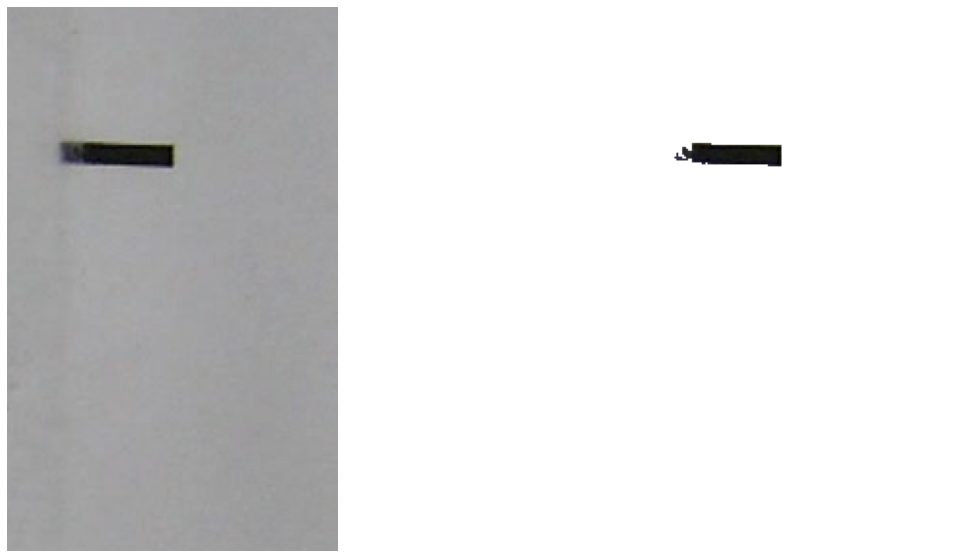

length of picture is  54.0 pixel


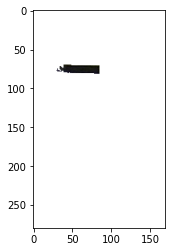

In [11]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

54 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 54


find definition length first picture

(1080, 1920, 3) (125, 763, 3)


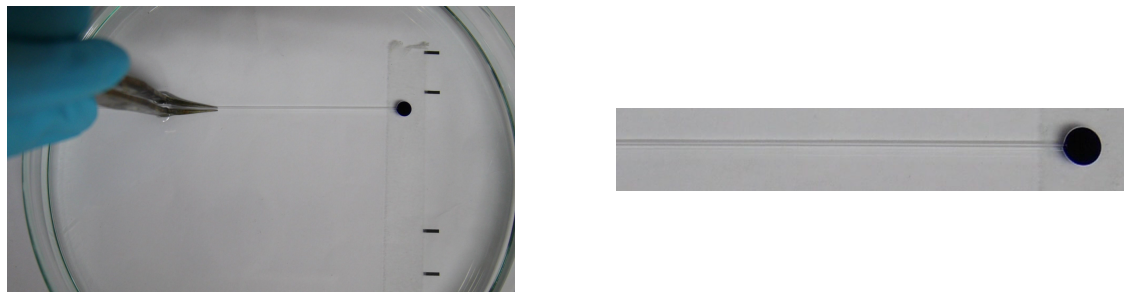

In [12]:
def_crop_im = crop(def_img, ((330, 625), (800, 357), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

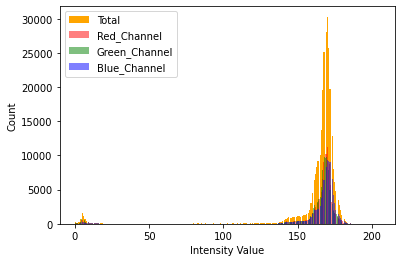

In [13]:
plot_histogram(def_crop_im)

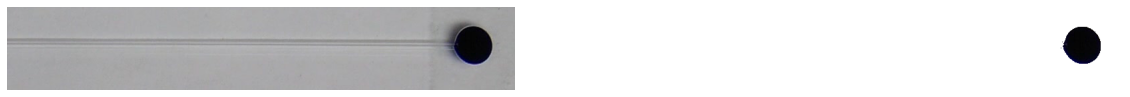

In [14]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[62, 668]
[60, 727]
ldef  59.033888572581766 pixel


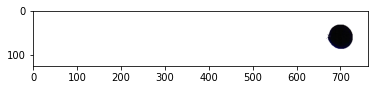

In [15]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 1777 to 1873

In [16]:
number_of_picture = 1777
thresh = 45
template1 = []
l_def = 59.033888572581766
#1866-1777 = 89
for i in range(90):
    if(True) :   
        image = mpimg.imread( "image\\11.11.2020 Heptane-0.002mM Triton x-100\\frame 1\\8-40-44 PM\\11.11.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((330, 625), (800, 357), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [17]:
print(template1)
print(len(template1))

[0, 0, 0, 0, 0, 0, 1, 3, 2, 3, 4, 14, 20, 29, 42, 54, 65, 76, 87, 98, 108, 117, 127, 138, 148, 158, 169, 179, 190, 198, 208, 218, 227, 236, 245, 254, 262, 271, 279, 288, 297, 306, 314, 322, 331, 339, 347, 355, 364, 372, 380, 388, 396, 402, 410, 418, 426, 434, 441, 448, 456, 463, 470, 478, 485, 493, 500, 507, 514, 521, 528, 535, 542, 549, 556, 562, 569, 575, 584, 589, 592, 607, 611, 613, 621, 629, 636, 642, 648, 654]
90


find length on crop value 2 from 1867 to 2496

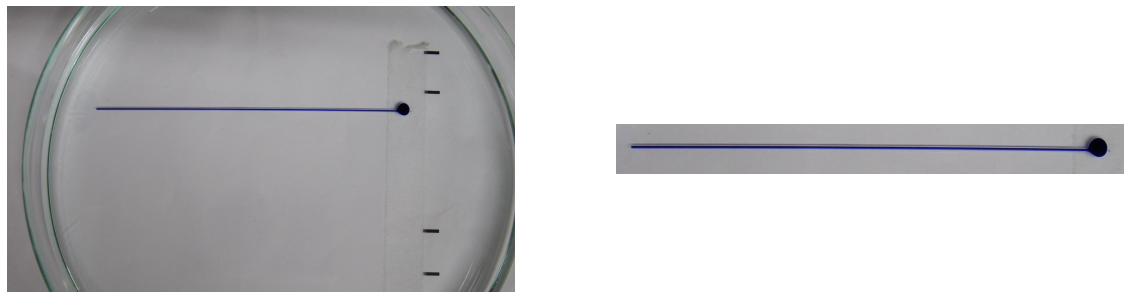

In [20]:
image = mpimg.imread( "image\\11.11.2020 Heptane-0.002mM Triton x-100\\frame 1\\8-40-44 PM\\11.11.2020 (1) " + str(2496).zfill(4) + ".jpg" )
crop_image = crop(image, ((330, 625), (300, 357), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [21]:
number_of_picture = 1867
thresh = 30
template2 = []
l_def = 59.033888572581766
#2496-1867 = 629
for i in range(630):
    if( True) :
        image = mpimg.imread( "image\\11.11.2020 Heptane-0.002mM Triton x-100\\frame 1\\8-40-44 PM\\11.11.2020 (1) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((330, 625), (300, 357), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [22]:
print(template2)
print(len(template2))

[660, 666, 671, 679, 684, 690, 696, 705, 707, 712, 718, 727, 731, 737, 742, 747, 753, 758, 763, 769, 774, 779, 784, 790, 795, 800, 804, 809, 814, 819, 823, 827, 832, 837, 841, 844, 848, 853, 858, 861, 864, 868, 873, 877, 881, 884, 887, 891, 895, 899, 904, 907, 910, 913, 917, 920, 923, 927, 931, 935, 938, 941, 943, 947, 951, 954, 957, 961, 964, 966, 969, 971, 972, 975, 979, 982, 986, 990, 994, 998, 1002, 1004, 1008, 1012, 1015, 1019, 1022, 1025, 1028, 1031, 1034, 1037, 1040, 1044, 1047, 1049, 1051, 1054, 1057, 1060, 1062, 1065, 1068, 1069, 1072, 1074, 1076, 1078, 1080, 1082, 1084, 1086, 1088, 1089, 1091, 1093, 1095, 1096, 1098, 1100, 1101, 1103, 1104, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1112, 1113, 1114, 1115, 1115, 1116, 1116, 1117, 1117, 1117, 1117, 1117, 1117, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1118, 1119, 1118, 1119, 1119, 1119, 1119, 1119, 1119, 1118,

concat 2 template and calculate pixel to centimeter

In [23]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [24]:
print(l_array)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 9.2592593e-03 2.7777778e-02 1.8518519e-02 2.7777778e-02
 3.7037037e-02 1.2962963e-01 1.8518518e-01 2.6851851e-01 3.8888890e-01
 5.0000000e-01 6.0185188e-01 7.0370370e-01 8.0555558e-01 9.0740740e-01
 1.0000000e+00 1.0833334e+00 1.1759260e+00 1.2777778e+00 1.3703704e+00
 1.4629630e+00 1.5648148e+00 1.6574074e+00 1.7592592e+00 1.8333334e+00
 1.9259260e+00 2.0185184e+00 2.1018519e+00 2.1851852e+00 2.2685184e+00
 2.3518519e+00 2.4259260e+00 2.5092592e+00 2.5833333e+00 2.6666667e+00
 2.7500000e+00 2.8333333e+00 2.9074075e+00 2.9814816e+00 3.0648148e+00
 3.1388888e+00 3.2129629e+00 3.2870371e+00 3.3703704e+00 3.4444444e+00
 3.5185184e+00 3.5925925e+00 3.6666667e+00 3.7222223e+00 3.7962964e+00
 3.8703704e+00 3.9444444e+00 4.0185184e+00 4.0833335e+00 4.1481481e+00
 4.2222223e+00 4.2870369e+00 4.3518519e+00 4.4259257e+00 4.4907408e+00
 4.5648150e+00 4.6296296e+00 4.6944447e+00 4.7592592e+00 4.8240743e+00
 4.888

export data to exel

In [25]:
import pandas as pd

In [26]:
print(len(l_array))

720


In [27]:
data = []
num_img = 1777
for i in range(len(l_array)):
    data.append(( " 11.11.2020 (1) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('HeptaneTRITON-0.002(1)_11.11.2020_8-40-44-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


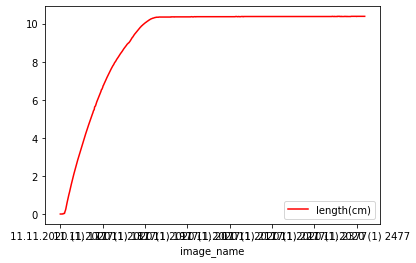

In [28]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()